In [60]:
import math
import matplotlib.pyplot as plt
import numpy as np

# problem 1
Code the bisection method for finding roots in a well-defined interval as introduced in Lecture 2. Be sure to comment and document your code thoroughly, as well as demonstrate their operation on the example function. 

#### a) Write a function “def f(x)” that defines the nonlinear function 𝑓(𝑥) = 𝑥𝑒^𝑥 − sin(8𝑥) − 0.5.

In [61]:
def f(x):
    return x*(math.e**x) - math.sin(8*x) - 0.5

#### (b) Plot the function 𝑓(𝑥) and determine its root(s) in the interval [0, 2].

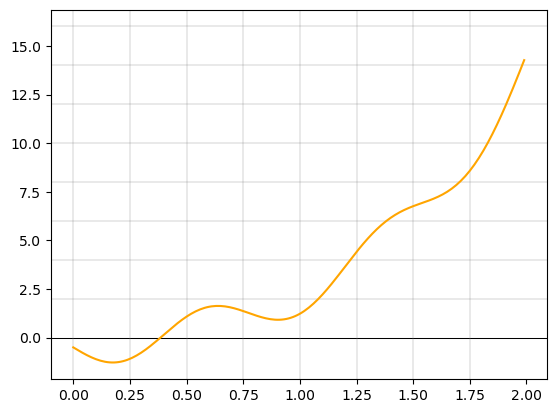

the root between 0 and 2 looks to be about 0.40


In [62]:
x = np.arange(0, 2, 0.01)
y=[]
for i in range(len(x)):
    y.append(f(x[i]))
plt.axhline(0, color='black', linewidth=.75)
plt.axhline(2, color='grey', linewidth=.25)
plt.axhline(4, color='grey', linewidth=.25)
plt.axhline(6, color='grey', linewidth=.25)
plt.axhline(8, color='grey', linewidth=.25)
plt.axhline(10, color='grey', linewidth=.25)
plt.axhline(12, color='grey', linewidth=.25)
plt.axhline(14, color='grey', linewidth=.25)
plt.axhline(16, color='grey', linewidth=.25)
plt.axvline(0, color='grey', linewidth=.25)
plt.axvline(.25, color='grey', linewidth=.25)
plt.axvline(.5, color='grey', linewidth=.25)
plt.axvline(.75, color='grey', linewidth=.25)
plt.axvline(1, color='grey', linewidth=.25)
plt.axvline(1.25, color='grey', linewidth=.25)
plt.axvline(1.5, color='grey', linewidth=.25)
plt.axvline(1.75, color='grey', linewidth=.25)

plt.plot(x,y, color="orange", linewidth=1.5)
plt.show()
print('the root between 0 and 2 looks to be about 0.40')

#### (c) Write a function “def bisection(f, x1, x2, tol)” that describes the main code of the bisection method, finding the root of 𝑓(𝑥) on the interval [𝑥1, 𝑥2] with a specified tolerance 𝑡𝑜𝑙.

In [63]:
def bisection(f, x1, x2, tol):
    x_1 = x1
    x_2 = x2
    ae = abs(x2-x1) / 2
    while (ae > tol):
        mid = (x2+x1)/2
        if f(mid)*f(x1) < 0:
            x2 = mid
            ae = abs(x2-x1) / 2
        else:
            x1 = mid
            ae = abs(x2-x1) / 2
    print('the root of f(x) on the interval [{},{}] is {}'.format(x_1,x_2,mid))
    print('with a tolerence of {}.\n'.format(tol))

#### (d) Employ your function bisection that calls the function 𝑓(𝑥) you implemented to find the root on the interval [0, 2] with a tolerance of 0.0001.

In [64]:
bisection(f, 0, 2, .0001) 

the root of f(x) on the interval [0,2] is 0.3846435546875
with a tolerence of 0.0001.



#### (e) Now choose a few different intervals that begins on the negative values of 𝑥 and find its roots (e.g., try [−10, 0], [−10, −8], and [−8.8, −8.6]). Did you get the same results? Why or why not?

In [65]:
bisection(f, -10, 0, .0001) 
bisection(f, -10, -8, .0001)
bisection(f, -8.8, -8.6, .0001)
bisection(f, -8.8, -8, .0001)
bisection(f, -8, 0, .0001)
bisection(f, -9, 0, .0001)

the root of f(x) on the interval [-10,0] is -5.822601318359375
with a tolerence of 0.0001.

the root of f(x) on the interval [-10,-8] is -8.1807861328125
with a tolerence of 0.0001.

the root of f(x) on the interval [-8.8,-8.6] is -8.7048828125
with a tolerence of 0.0001.

the root of f(x) on the interval [-8.8,-8] is -8.7048828125
with a tolerence of 0.0001.

the root of f(x) on the interval [-8,0] is -7.9197998046875
with a tolerence of 0.0001.

the root of f(x) on the interval [-9,0] is -0.2926483154296875
with a tolerence of 0.0001.



The results were not the same as the function has multiple roots and my bisection function will only find one, depending on the midpoints. My function checks to see if there is a root between x1 and the midpoint first, and will ignore any roots between the midpoint and x2, this occurs for each iteration of the bisection function, causing different results for different intervals.

# problem 2
Adapt your bisection function so that when it provides the root for function 𝑓(𝑥) it also
provides a single plot of the (i) true percent relative error and (ii) approximate percent relative
error versus iteration number. Make sure to plot the errors versus iteration number on the
appropriate semilog axes. 

#### Provide the plot of errors versus iteration number that results for the root found for 𝑓(𝑥) =𝑥𝑒^𝑥 − sin(8𝑥) − 0.5 on the interval [0, 2] with a tolerance of 1 × 10−5.

In [66]:
# to get the truevalue:
from scipy.optimize import brentq

the root of f(x) on the interval [0,2] is 0.3845672607421875
with a tolerence of 1e-05.



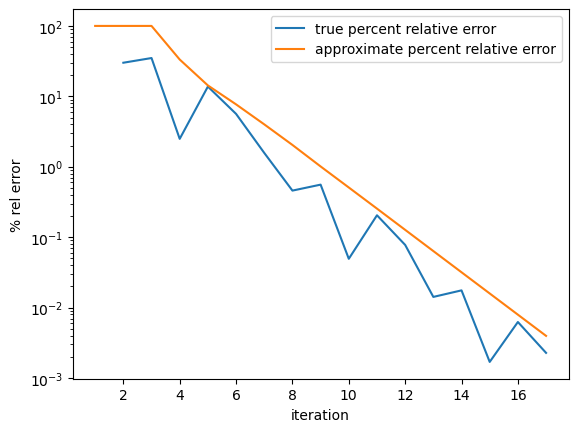

In [67]:
def bisectionError(f, x1, x2, tol):
    x_1 = x1
    x_2 = x2
    itr = 0
    xaxis=[]
    true_percent_relative_error=[]
    approx_percent_relative_error=[]
    e = 100
    oldmid=0
    while (e > tol):
        itr += 1
        mid = (x1+x2)/2
        if f(mid)*f(x1) < 0:
            x2 = mid
        else:
            x1 = mid
        e = (x2-x1)/2

        approx_percent_relative_error.append(abs(mid-oldmid)/abs(mid)*100)
        # approx error = current approx - prior approx
        # apre = approx error/approx * 100% 
        oldmid=mid
        
        xaxis.append(itr)
        
        true_percent_relative_error.append((abs(brentq(f, x_1, x_2)-mid)/abs(brentq(f, x_1, x_2))*100))
        # approximation + error = true value
        # true value - approximation = true error
        # true error/true value * 100% = tpre
        
    print('the root of f(x) on the interval [{},{}] is {}'.format(x_1,x_2,mid))
    print('with a tolerence of {}.\n'.format(tol))
    plt.plot(xaxis[1:17],true_percent_relative_error[1:17], label='true percent relative error')
    plt.plot(xaxis[0:17],approx_percent_relative_error[0:17],label='approximate percent relative error')
    plt.yscale("log")
    plt.ylabel('% rel error')
    plt.xlabel('iteration')
    plt.legend()
    plt.show()
    
bisectionError(f,0,2,.00001)

# problem 3
Modify your bisection function to account for the deficiencies identified in Problem 5. In
other words, how can you modify the code to find more than one root? One approach is to
divide the interval into subintervals and search for roots in each subinterval. Therefore, the
smaller the subintervals, the more accurate your root finding will be.

#### (a) Write a function “def BisectMany(f, x1, x2, tol, subintervals)” that is able to find multiple roots within [𝑥1, 𝑥2], where subinterval defines the number of the subintervals in which you will search for roots. Call your previously defined bisection function within this function.

In [145]:
def bisection(f, x1, x2, tol):
    x_1 = x1
    x_2 = x2
    ae = abs(x2-x1) / 2
    roots = []
    while (ae > tol):
        mid = (x2+x1)/2
        if f(mid)*f(x1) < 0:
            x2 = mid
            ae = abs(x2-x1) / 2
        else:
            x1 = mid
            ae = abs(x2-x1) / 2
    return mid
            
def BisectMany(f,x1,x2,tol,subintervals):
    points = []
    roots = []
    for i in range(int((x2-x1)/(subintervals))):
        points.append(i*subintervals+x1)
    points.append(x2)
    for i in range(len(points)-1):
        if f(points[i])*f(points[i+1]) < 0:
            roots.append(bisection(f, points[i], points[i+1], tol))
    print(f'the roots in the interval [{x1},{x2}] with subintervals of {subintervals} are {roots}\n')
    plt.plot(roots,np.zeros_like(roots),'ro',markersize=4)

#### (b) Employ your BisectMany function for the interval [−10,2] with the same tolerance as before, and subinterval sizes of 2, 1, 0.1, and 0.01. What do you find?

the roots in the interval [-10,2] with subintervals of 2 are [-8.180892944335938, -7.9198455810546875, 0.3845672607421875]

the roots in the interval [-10,2] with subintervals of 1 are [-8.180892944335938, -7.9198455810546875, -5.0348663330078125, -4.7837066650390625, -1.0468292236328125, -0.9164276123046875, 0.3845672607421875]

the roots in the interval [-10,2] with subintervals of 0.1 are [-9.75194091796875, -9.490319824218751, -8.966467285156249, -8.705041503906248, -8.18089599609375, -7.919836425781251, -7.395178222656251, -7.1348510742187505, -6.60914306640625, -6.35023193359375, -5.82252197265625, -5.5663208007812495, -5.034851074218751, -4.78370361328125, -4.24527587890625, -4.003283691406249, -3.45238037109375, -3.2264770507812495, -2.6542602539062496, -2.45501708984375, -1.8494506835937496, -1.6892211914062496, -1.0468383789062499, -0.9164184570312504, -0.2925170898437489, -0.07586669921874974, 0.3845825195312504]

the roots in the interval [-10,2] with subintervals of 0.01 a

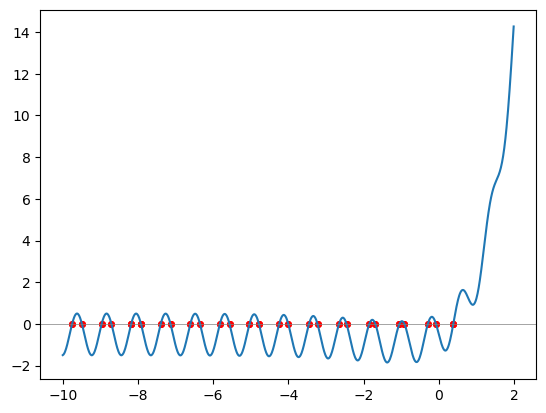

In [146]:
BisectMany(f,-10,2,.00001,2)
BisectMany(f,-10,2,.00001,1)
BisectMany(f,-10,2,.00001,.1)
BisectMany(f,-10,2,.00001,.01)
x=np.arange(-10, 2, 0.01)
y=[]
for i in range(len(x)):
    y.append(f(x[i]))
plt.plot(x,y)
plt.axhline(0, color='grey', linewidth=.5)
plt.show()

i found that with smaller intervals came more roots, and without a conditional to ensure that there was a root within the intervals, many roots that weren't actually roots occured. with many intervals, it is important to actually ensure a root is within the interval, and with very small intervals there is a good chance that there won't be a root when the left and right sides of the interval have the same sign.

# problem 4

In [78]:
def CalAge(RadAge):
    t=5000
    # t = 5000 found from running the function with t=0 and tol of 1 (t += 1) and lowering the tol while bringing the 
    # inital t value closer to the results from running the fuction with those inital values. I raised the initial t 
    # to 5000, as a t of 5425.7... was the first possible CalAge value to produce a RadAge of 4518. this shortened the
    # run time of the function and allowed a lower t increase in the loop to have a more accurate estimate.
    rad=[]
    cal=[]
    RA = .92*t-240 + 250*math.cos((t+700)*(2*math.pi)/9000) + 50*math.sin(t*(2*math.pi)/200) + 20*math.cos(t*(2*math.pi)/11)
    while RA < 1.1*RadAge:
        t += .001
        RA = .92*t-240 + 250*math.cos((t+700)*(2*math.pi)/9000) + 50*math.sin(t*(2*math.pi)/200) + 20*math.cos(t*(2*math.pi)/11)
        if RA >= 4517.5 and RA <= 4518.5:
            rad.append(RA)
            cal.append(t)
    cal.sort()
    print(f'when the radio age is 4518 the calendar age is in the range [{round(cal[1],3)},{round(cal[-1],3)}]')

CalAge(4518)

when the radio age is 4518 the calendar age is in the range [5245.734,5363.707]


# problem 5
#### (a) Starting with the notebook provided for Discussion 1, define a function 𝑔(𝑥) = sin(𝑥) + cos(3𝑥). Plot the function on the domain [−1, 2].

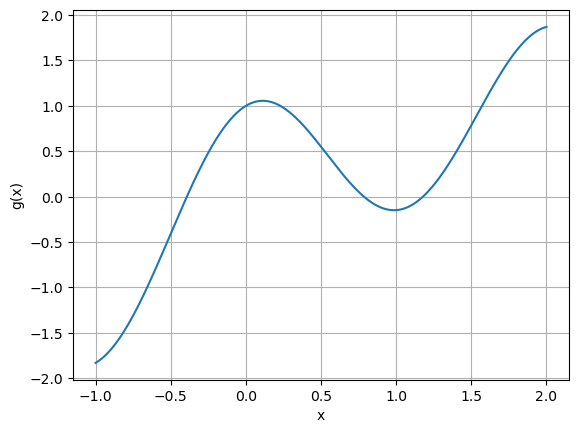

In [141]:
def g(x):
    return np.sin(x)+np.cos(3*x)

xvals = np.linspace((-1), (2), 500)
plt.plot(xvals,g(xvals))
plt.xlabel('x')
plt.ylabel('g(x)')

plt.grid()

#### (b) Define a second function, taylor_g(x, nth_order), which calculates the nthorder Taylor polynomial approximation centered at 𝒙 = 𝟎. 𝟐𝟓 for 𝑔(𝑥) by adding together the requisite number of consecutive terms in the Taylor series, evaluated at the specified 𝑥 value. Plot 𝑔(𝑥), along with the Taylor polynomials (centered about 0.25) of order 1, 2, 3, and 4. Plot on a domain of [−0.5, 1], and include a legend which labels each Taylor polynomial by its order.

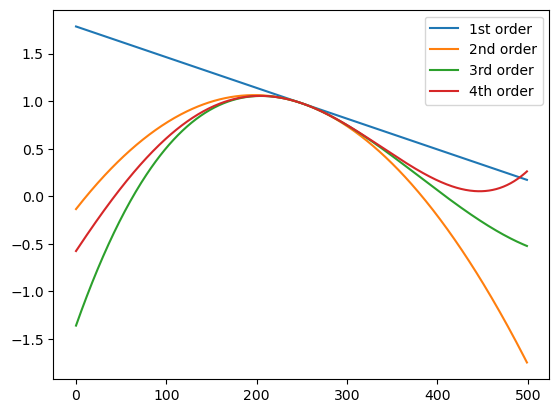

In [72]:
def g_prime_n(x,n):
    assert int(n) >= 0
    if n%4 == 0 :
        return np.sin(x)+3**n*np.cos(3*x)
    if n%4 == 1:
        return np.cos(x)+3**n*(-np.sin(3*x))
    if n%4 == 2:
        return -np.sin(x)+3**n*(-np.cos(3*x))
    if n%4 == 3:
        return -np.cos(x)+3**n*(np.sin(3*x))

def taylor_g(x,xi, nth_order):
    res=0
    for i in range(nth_order+1):
        res+= (x-xi)**i / math.factorial(i)*g_prime_n(xi,i)
    return res

xvals = np.linspace(-.5, 1, 500)
plt.plot(taylor_g(xvals,.25,1),label='1st order')
plt.plot(taylor_g(xvals,.25,2),label='2nd order')
plt.plot(taylor_g(xvals,.25,3),label='3rd order')
plt.plot(taylor_g(xvals,.25,4),label='4th order')
plt.legend()
plt.show()

#### (c) Calculate the true relative error of the Taylor approximations at 𝑥 = 0.1. What order  Taylor polynomial is required to achieve a true relative error below 0.1%, one tenth of one percent?

In [127]:
x=.1
xi=.25
order = 0
re=100
first = 1
while re > .0001:
    order+=1
    re = 100*abs(g(x)-taylor_g(x,xi,order))/g(x)
    print(f'tpre of {re} for taylor approximation order {order}')
    if re < .1 and first == 1:
        print(f'{order} order approximation required for an tpre below .1% \n')
        first += 1
    if re < .001 and first == 2:
        print(f'{order} order approximation required for an tpre below a tenth of .001% \n')
        first += 1

tpre of 8.086233377491242 for taylor approximation order 1
tpre of 0.8014546802806221 for taylor approximation order 2
tpre of 0.12800467759054365 for taylor approximation order 3
tpre of 0.009030690680924228 for taylor approximation order 4
4 order approximation required for an tpre below .1% 

tpre of 0.0008449506541853932 for taylor approximation order 5
5 order approximation required for an tpre below a tenth of .001% 

tpre of 4.4843732757259496e-05 for taylor approximation order 6


#### (d) Here you will write an algorithm to approximate the value of 𝑔(0.1) to a desired accuracy, without knowing the "true" value of 𝑔(0.1). Begin by calculating the firstorder Taylor polynomial approximation for 𝑔(0.1). Use this as your "best current approximation" for the true value in order to calculate the relative approximate error of the second-order Taylor polynomial. If the relative approximate error is not less than 1%, continue by calculating the thirdorder Taylor polynomial, and estimate the error using the second-order polynomial as the new "best approximation". Continue iterating in this manner, using the most recent Taylor polynomial as the best approximation for the true value of the function, until you reach a relative approximate error below 1%. What order Taylor polynomial is required to achieve a true relative error below 1%, one percent?

In [136]:
x=.1
xi=0
order=1
tpre=100
bca = taylor_g(x, xi, order)

while tpre > 1:
    order += 1
    ca = taylor_g(x, xi, order)
    tpre = 100*abs(bca-ca)/bca
    bca = ca
    print(f'tpre of {tpre} for taylor approximation order {order}')
print(f"{order} order approximation required for a tpre below 1%")

tpre of 4.090909090909084 for taylor approximation order 2
tpre of 0.015797788309634908 for taylor approximation order 3
3 order approximation required for a tpre below 1%


# problem 6

#### (a) Write a function taylor_sin(x, nterms) which calculates the nth-order Taylor polynomial approximation for 𝐬𝐢𝐧(𝒙) by adding together n consecutive terms in the Taylor series, evaluated at the specified x value.

In [137]:
def taylor_sin(x, nterms):
    sinsum = 0
    for n in range(nterms+1):
        sinsum += (((-1)**n)*(x**(2*n+1))) / (math.factorial(2*n+1))
    return(sinsum)


#### (b) Plot 𝐬𝐢𝐧(𝒙) on the domain [−𝝅, 𝝅] in black. In the same figure the Taylor polynomial approximations of sin(x) with n = 0, 1, 2, and 3 (i.e. polynomial orders 1, 3, 5, 7).

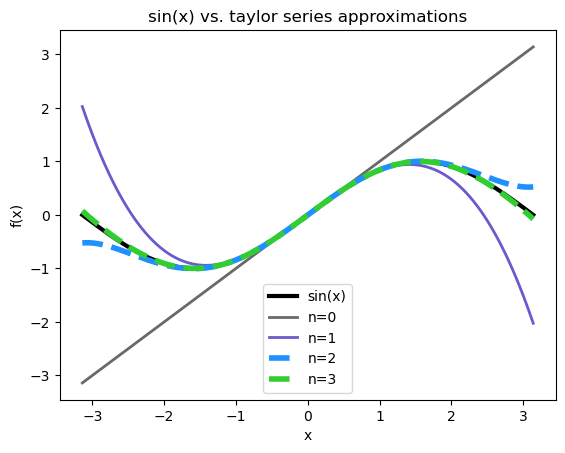

In [75]:
xvals = np.linspace((-1)*(math.pi), (math.pi), 500)

plt.plot(xvals, np.sin(xvals),label='sin(x)',color='black',linewidth=3)

n0=[]
n1=[]
n2=[]
n3=[]

for i in xvals:
    n0.append(taylor_sin(i, 0))
    n1.append(taylor_sin(i, 1))
    n2.append(taylor_sin(i, 2))
    n3.append(taylor_sin(i, 3))


plt.plot(xvals,n0,'-',label='n=0',color='dimgrey',linewidth=2)
plt.plot(xvals,n1,'-',label='n=1',color='slateblue',linewidth=2)
plt.plot(xvals,n2,'--',label='n=2',color='dodgerblue',linewidth=4)
plt.plot(xvals,n3,'--',label='n=3',color='limegreen',linewidth=4)

plt.legend()

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('sin(x) vs. taylor series approximations')

plt.show()

#### (c) Calculate the true absolute error between 𝐬𝐢𝐧(𝒙) evaluated at 𝝅 and the nth-term  Taylor polynomial evaluated at 𝝅, where 𝒏 ranges from [𝟎, 𝟐𝟎] (i.e. up to polynomial of order 41). Plot the true absolute error as a function of Taylor polynomial order on a semilog y plot (x-axis is linear, y-axis is logarithmic). Is there a limit to how precisely you can approximate 𝐬𝐢𝐧(𝒙) at 𝝅? If so, why does this limit exist?

the true absolute error is 3.141592653589793 when n=0
the true absolute error is 2.0261201264601763 when n=1
the true absolute error is 0.5240439134171687 when n=2
the true absolute error is 0.07522061590362318 when n=3
the true absolute error is 0.006925270707505013 when n=4
the true absolute error is 0.00044516023820933523 when n=5
the true absolute error is 2.11425675582771e-05 when n=6
the true absolute error is 7.727858895531034e-07 when n=7
the true absolute error is 2.241951059444742e-08 when n=8
the true absolute error is 5.289184028224389e-10 when n=9
the true absolute error is 1.0348063438373582e-11 when n=10
the true absolute error is 1.704082785584719e-13 when n=11
the true absolute error is 2.6136460251390037e-15 when n=12
the true absolute error is 1.8108484514561733e-16 when n=13
the true absolute error is 2.106518605741664e-16 when n=14
the true absolute error is 2.103380812778216e-16 when n=15
the true absolute error is 2.103410139269922e-16 when n=16
the true absolute

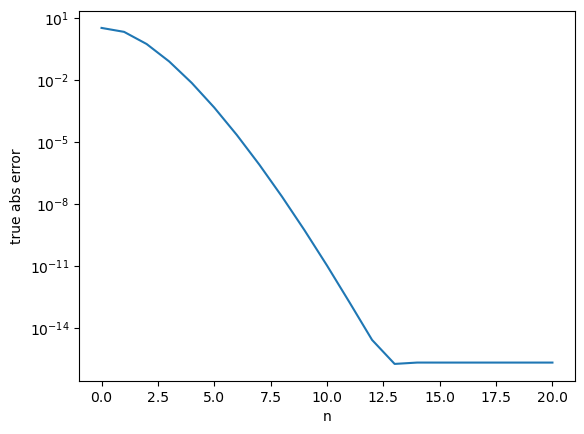

In [76]:
xvals = np.arange(0, 21, 1)
y=[]
for i in xvals:
    y.append(abs(np.sin(np.pi)-taylor_sin(np.pi,i)))
    # true error = true value - approximation
    print(f'the true absolute error is {y[i]} when n={xvals[i]}')

plt.plot(xvals,y)
plt.yscale('log')

plt.xlabel('n')
plt.ylabel('true abs error')
plt.show()

there is a limit to how precisely we can predict sin(pi), one reason could be due to the truncation error with python calculations. without this limitation on decimal places, there would be more and more precision with each iteration until infinity.

#### (d) Now calculate the true absolute error between 𝐬𝐢𝐧(𝒙) evaluated at 𝟐𝝅 and the nthorder Taylor polynomial evaluated at 𝟐𝝅, where 𝒏 ranges from [𝟎, 𝟐𝟎] (𝒊. 𝒆. 𝒖𝒑 𝒕𝒐 𝒑𝒐𝒍𝒚𝒏𝒐𝒎𝒊𝒂𝒍 𝒐𝒇 𝒐𝒓𝒅𝒆𝒓 𝟒𝟏). Plot the true absolute errors as a function of the Taylor polynomial order on a semilog y plot (x-axis is linear, y-axis is logarithmic), alongside the error from part (c) calculated at 𝝅. Are the Taylor polynomials more accurate at 𝝅 or 𝟐𝝅, and why is that the case?

the true absolute error is 6.283185307179586 when n=0
the true absolute error is 35.05851693322017 when n=1
the true absolute error is 46.546732342854874 when n=2
the true absolute error is 30.159127410206487 when n=3
the true absolute error is 11.899566534691147 when n=4
the true absolute error is 3.1950760421318374 when n=5
the true absolute error is 0.6248765427164427 when n=6
the true absolute error is 0.09324575906205743 when n=7
the true absolute error is 0.010983403146082352 when n=8
the true absolute error is 0.001048182796038266 when n=9
the true absolute error is 8.274095221352927e-05 when n=10
the true absolute error is 5.494383778900698e-06 when n=11
the true absolute error is 3.1126862404920165e-07 when n=12
the true absolute error is 1.5224210750509713e-08 when n=13
the true absolute error is 6.494597877334955e-10 when n=14
the true absolute error is 2.4376120247956998e-11 when n=15
the true absolute error is 8.151443089588602e-13 when n=16
the true absolute error is 2.05

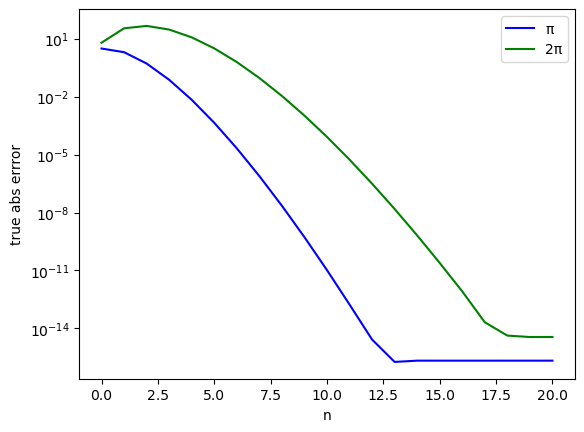

In [140]:
y1=[]
for i in xvals:
    y1.append(abs(np.sin(2*np.pi)-taylor_sin(2*np.pi,i)))
    print(f'the true absolute error is {y1[i]} when n={xvals[i]}')

plt.plot(xvals,y,"b-",label='π')
plt.plot(xvals,y1,"g-",label='2π')
plt.legend()
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('true abs errror')
plt.show()

the taylor approximation is more accurate at pi. this could be because pi is closer to 0 than 2pi, and i centered my approximation around 0. taylor series approximations tend to converge faster when the x that we are trying to approximate with is closer to the center. 